In [63]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Compile all results from the polymer experiments

In [64]:
import matplotlib.pyplot as plt

plt.style.use(["science", "nature"])

import pandas as pd
from glob import glob
from pathlib import Path

from gpt3forchem.helpers import mean_confidence_interval, get_else_nan

from fastcore.utils import load_pickle

import pandas as pd


## Classification

In [65]:
all_results = glob('results/20220913_polymer_classification/*.pkl')

In [66]:
loaded_res = load_pickle(all_results[-1])

In [67]:
loaded_res

{'model_type': 'ada',
 'train_set_size': 10,
 'prefix': '',
 'train_size': 10,
 'test_size': 3115,
 'cm': pycm.ConfusionMatrix(classes: ['0', '1', '2', '3', '4']),
 'accuracy': 0.6848,
 'completions': {'choices': [<OpenAIObject at 0x1741d2180> JSON: {
     "finish_reason": "length",
     "index": 0,
     "logprobs": null,
     "text": " 1@@@@@@@@@@@@@@"
   },
   <OpenAIObject at 0x2a5182540> JSON: {
     "finish_reason": "length",
     "index": 1,
     "logprobs": null,
     "text": " 4@@@@@@@@@@@@@@@@"
   },
   <OpenAIObject at 0x2a5182810> JSON: {
     "finish_reason": "length",
     "index": 2,
     "logprobs": null,
     "text": " 4@@@@@@@@@@@@@@@"
   },
   <OpenAIObject at 0x2a51828b0> JSON: {
     "finish_reason": "length",
     "index": 3,
     "logprobs": null,
     "text": " 4@@@@@@@@@@@@@@@"
   },
   <OpenAIObject at 0x2a5182630> JSON: {
     "finish_reason": "length",
     "index": 4,
     "logprobs": null,
     "text": " 3@@@@@@@@@@@@@@@"
   },
   <OpenAIObject at 0x2a51829

In [68]:
cm = loaded_res['cm']

In [69]:
compiled_results = []
compiled_baseline_results = []

for res in all_results: 
    loaded_res = load_pickle(res)
    
    res = {
        'accuracy': get_else_nan(loaded_res['cm'], "ACC_Macro"),
        'f1_macro': get_else_nan(loaded_res['cm'], "F1_Macro"),
        'f1_micro': get_else_nan(loaded_res['cm'], "F1_Micro"),
        'mcc': get_else_nan(loaded_res['cm'], "Overall_MCC"),
        "train_size": loaded_res['train_size'],
    }
    baseline_res = {
        'baseline_accuracy': get_else_nan(loaded_res['baseline_cm'],"ACC_Macro"),
        'baseline_f1_macro': get_else_nan(loaded_res['baseline_cm'], "F1_Macro"),
        'baseline_f1_micro': get_else_nan(loaded_res['baseline_cm'], "F1_Micro"),
        'baseline_mcc': get_else_nan(loaded_res['baseline_cm'],"Overall_MCC"),
        "train_size": loaded_res['train_size'],
    }
    compiled_results.append(res)
    compiled_baseline_results.append(baseline_res)

In [70]:
compiled_results = pd.DataFrame(compiled_results)
compiled_baseline_results = pd.DataFrame(compiled_baseline_results)

In [71]:
compiled_results_agg = compiled_results.groupby('train_size').agg(['mean', 'std', mean_confidence_interval])

In [72]:
compiled_results_agg

accuracy                                     f1_macro            \
                mean       std mean_confidence_interval      mean       std   
train_size                                                                    
10          0.684686  0.006732          (nan, nan, nan)  0.112933  0.035100   
50          0.729280  0.021049          (nan, nan, nan)  0.244508  0.042908   
100         0.778733  0.017653          (nan, nan, nan)  0.307684  0.090173   
200         0.894000  0.003960          (nan, nan, nan)  0.731222  0.012927   
500         0.920000  0.001131          (nan, nan, nan)  0.801405  0.000480   
1000        0.906467  0.044029          (nan, nan, nan)  0.712563  0.189718   
2000        0.927911  0.002019          (nan, nan, nan)  0.767989  0.083297   
3000        0.895938  0.052105          (nan, nan, nan)  0.478697  0.440184   

                                     f1_micro            \
           mean_confidence_interval      mean       std   
train_size                                                
10                  (nan, nan, nan)  0.211714  0.016830   
50                  (nan, nan, nan)  0.323200  0.052623   
100                 (nan, nan, nan)  0.421000  0.045855   
200                 (nan, nan, nan)  0.735000  0.009899   
500                 (nan, nan, nan)  0.800000  0.002828   
1000                (nan, nan, nan)  0.735000  0.154149   
2000                (nan, nan, nan)  0.808000  0.017776   
3000                (nan, nan, nan)  0.496000  0.426783   

                                          mcc            \
           mean_confidence_interval      mean       std   
train_size                                                
10                  (nan, nan, nan)  0.025603  0.058745   
50                  (nan, nan, nan)  0.173869  0.069723   
100                 (nan, nan, nan)  0.309287  0.041058   
200                 (nan, nan, nan)  0.671387  0.013146   
500                 (nan, nan, nan)  0.750022  0.004010   
1000                (nan, nan, nan)  0.688729  0.164362   
2000                (nan, nan, nan)  0.761469  0.020452   
3000                (nan, nan, nan)  0.478148  0.406149   

                                     
           mean_confidence_interval  
train_size                           
10                  (nan, nan, nan)  
50                  (nan, nan, nan)  
100                 (nan, nan, nan)  
200                 (nan, nan, nan)  
500                 (nan, nan, nan)  
1000                (nan, nan, nan)  
2000                (nan, nan, nan)  
3000                (nan, nan, nan)

In [73]:
compiled_baseline_results_agg  = compiled_baseline_results.groupby('train_size').agg(['mean', 'std', mean_confidence_interval])

/var/folders/m9/_txh68y946s4pxy1x2wnd3lh0000gn/T/ipykernel_30086/3152393488.py:1: FutureWarning: ['baseline_mcc'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  compiled_baseline_results_agg  = compiled_baseline_results.groupby('train_size').agg(['mean', 'std', mean_confidence_interval])


In [74]:
compiled_baseline_results_agg

baseline_accuracy                                     \
                        mean       std mean_confidence_interval   
train_size                                                        
10                  0.680000       NaN          (nan, nan, nan)   
50                  0.783111  0.015611          (nan, nan, nan)   
100                 0.806634  0.004902          (nan, nan, nan)   
200                 0.833162  0.008730          (nan, nan, nan)   
500                 0.867530  0.004423          (nan, nan, nan)   
1000                0.883671  0.002662          (nan, nan, nan)   
2000                0.914311  0.001006          (nan, nan, nan)   
3000                0.928000  0.002263          (nan, nan, nan)   

           baseline_f1_macro                                     \
                        mean       std mean_confidence_interval   
train_size                                                        
10                  0.066667       NaN          (nan, nan, nan)   
50                  0.461114  0.038230          (nan, nan, nan)   
100                 0.507178  0.007745          (nan, nan, nan)   
200                 0.579954  0.025984          (nan, nan, nan)   
500                 0.666996  0.012498          (nan, nan, nan)   
1000                0.708855  0.010098          (nan, nan, nan)   
2000                0.785714  0.001901          (nan, nan, nan)   
3000                0.821603  0.007112          (nan, nan, nan)   

           baseline_f1_micro                                     
                        mean       std mean_confidence_interval  
train_size                                                       
10                  0.200000       NaN          (nan, nan, nan)  
50                  0.457778  0.039028          (nan, nan, nan)  
100                 0.516584  0.012255          (nan, nan, nan)  
200                 0.582906  0.021824          (nan, nan, nan)  
500                 0.668825  0.011056          (nan, nan, nan)  
1000                0.709176  0.006655          (nan, nan, nan)  
2000                0.785778  0.002514          (nan, nan, nan)  
3000                0.820000  0.005657          (nan, nan, nan)

In [89]:
def compile_table_row(row):
    template =  "\\num⁍ {accuracy} \\pm {accuracy_std} ⁌ &  \\num⁍ {f1_micro} \\pm {f1_micro_std}  ⁌ & \\num⁍ {f1_macro} \\pm {f1_macro_std} ⁌\\\\"
    row = row.round(2)
    string = template.format(
        accuracy=row['accuracy']['mean'].values[0],
        accuracy_std=row['accuracy']['std'].values[0],
        f1_micro=row['f1_micro']['mean'].values[0],
        f1_micro_std=row['f1_micro']['std'].values[0],
        f1_macro=row['f1_macro']['mean'].values[0],
        f1_macro_std=row['f1_macro']['std'].values[0]
    )

    return string.replace("⁍", "{").replace("⁌", "}")

def compile_table_baseline_row(row):
    template =  "\\num⁍ {accuracy} \\pm {accuracy_std} ⁌ &  \\num⁍ {f1_micro} \\pm {f1_micro_std}  ⁌ & \\num⁍ {f1_macro} \\pm {f1_macro_std} ⁌\\\\"
    row = row.round(2)
    string = template.format(
        accuracy=row['baseline_accuracy']['mean'].values[0],
        accuracy_std=row['baseline_accuracy']['std'].values[0],
        f1_micro=row['baseline_f1_micro']['mean'].values[0],
        f1_micro_std=row['baseline_f1_micro']['std'].values[0],
        f1_macro=row['baseline_f1_macro']['mean'].values[0],
        f1_macro_std=row['baseline_f1_macro']['std'].values[0]
    )

    return string.replace("⁍", "{").replace("⁌", "}")

In [92]:
print(compile_table_row(compiled_results_agg[compiled_results_agg.index==2000]))

\num{ 0.93 \pm 0.0 } &  \num{ 0.81 \pm 0.02  } & \num{ 0.77 \pm 0.08 }\\


In [93]:
print(compile_table_baseline_row(compiled_baseline_results_agg[compiled_baseline_results_agg.index==2000]))

\num{ 0.91 \pm 0.0 } &  \num{ 0.79 \pm 0.0  } & \num{ 0.79 \pm 0.0 }\\


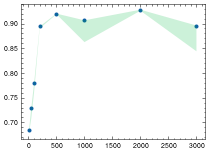

In [78]:
plt.scatter(compiled_results_agg.index, compiled_results_agg['accuracy']['mean'],  label='GPT-3')

plt.fill_between(compiled_results_agg.index, compiled_results_agg['accuracy']['mean'], compiled_results_agg['accuracy']['mean']- compiled_results_agg['accuracy']['std'],
compiled_results_agg['accuracy']['mean']+ compiled_results_agg['accuracy']['std'],
 alpha=0.2)

## Polymer regression

In [79]:
all_regression_results = glob('results/20220913_polymer_regression/*.pkl')

In [80]:
load_pickle(all_regression_results[0])

{'model_type': 'ada',
 'train_set_size': 50,
 'prefix': '',
 'train_size': 50,
 'test_size': 3075,
 'completions': {'choices': [<OpenAIObject at 0x29c912770> JSON: {
     "finish_reason": "length",
     "index": 0,
     "logprobs": null,
     "text": " -10.2@@@ -10.6"
   },
   <OpenAIObject at 0x280052450> JSON: {
     "finish_reason": "length",
     "index": 1,
     "logprobs": null,
     "text": " -10.2@@@ -11.6"
   },
   <OpenAIObject at 0x2a44722c0> JSON: {
     "finish_reason": "length",
     "index": 2,
     "logprobs": null,
     "text": " -10.2@@@ -6.2"
   },
   <OpenAIObject at 0x1741d2a40> JSON: {
     "finish_reason": "length",
     "index": 3,
     "logprobs": null,
     "text": " -10.2@@@ -6.2"
   },
   <OpenAIObject at 0x2a439e040> JSON: {
     "finish_reason": "length",
     "index": 4,
     "logprobs": null,
     "text": " -6.2@@@ -6.6"
   },
   <OpenAIObject at 0x2a439eb80> JSON: {
     "finish_reason": "length",
     "index": 5,
     "logprobs": null,
     "text": " -

In [81]:
compiled_regression_results = []
compiled_regression_baseline_results = []

for res_file in all_regression_results:
    res = load_pickle(res_file)
    res_dict = {
        'r2': res['r2'],
        'max_error': res['max_error'],
        'mean_absolute_error': res['mean_absolute_error'],
        'mean_squared_error': res['mean_squared_error'],
    }
    res_dict['train_size'] = res['train_size']

    baseline_res_dict = res['baseline']
    baseline_res_dict['train_size'] = res['train_size']

    compiled_regression_results.append(res_dict)
    compiled_regression_baseline_results.append(baseline_res_dict)
    

In [82]:
compiled_regression_results = pd.DataFrame(compiled_regression_results)
compiled_regression_baseline_results = pd.DataFrame(compiled_regression_baseline_results)

In [83]:
compiled_regression_results

,r2,max_error,mean_absolute_error,mean_squared_error,train_size
0,0.226682,8.9,2.3872,8.70068,50
1,0.960231,2.2,0.4876,0.39920,2000
2,-0.471216,9.6,3.1950,15.81442,10
3,-0.813002,10.8,3.7378,20.07566,50
4,-0.086554,9.6,2.7936,11.96268,100
5,0.918636,3.7,0.7476,0.88252,200
6,0.951639,2.3,0.5610,0.51410,2000
7,-0.531096,9.9,3.3098,16.08110,50
8,NaN,NaN,NaN,NaN,200
9,NaN,NaN,NaN,NaN,2000


In [84]:
compiled_regression_baseline_results

,r2,max_error,mean_absolute_error,mean_squared_error,train_size
0,0.635824,6.489332,1.629673,3.967593,50
1,0.944801,2.728487,0.612519,0.593956,2000
2,-13.970356,21.173496,12.322070,162.701655,10
3,0.735930,5.862946,1.372755,2.876094,50
4,0.907017,3.676136,0.800270,1.005736,100
5,0.920414,3.754526,0.741565,0.866107,200
6,0.940072,2.534259,0.639284,0.653068,2000
7,0.755778,5.232044,1.312021,2.659316,50
8,0.922029,3.250593,0.734493,0.849026,200
9,-0.604548,9.072791,3.808230,17.396450,2000


In [85]:
compiled_regression_results_agg = compiled_regression_results.groupby('train_size').agg(['median', 'mean', 'std', mean_confidence_interval])

compiled_regression_baseline_results = compiled_regression_baseline_results.groupby('train_size').agg(['median','mean', 'std', mean_confidence_interval])



In [86]:
compiled_regression_results_agg

r2                      \
              median      mean       std   
train_size                                 
10         -0.381374 -0.355163  0.332302   
50         -0.066815 -0.172328  0.420226   
100         0.339904  0.295944  0.329221   
200         0.918636  0.906951  0.032941   
500         0.941871  0.943389  0.004549   
1000        0.950844  0.948633  0.006739   
2000        0.956460  0.956359  0.003860   
3000        0.966634  0.966315  0.006547   

                                                              max_error  \
                                     mean_confidence_interval    median   
train_size                                                                
10                                            (nan, nan, nan)     10.00   
50          (-0.17232795020670255, -0.6133277285277272, 0....      9.15   
100         (0.29594357216324657, -0.04955262842118263, 0....      8.35   
200                                           (nan, nan, nan)      3.60   
500                                           (nan, nan, nan)      2.90   
1000        (0.9486330539208673, 0.9402648808928059, 0.957...      2.50   
2000                                          (nan, nan, nan)      2.30   
3000                                          (nan, nan, nan)      1.95   

                                 \
                 mean       std   
train_size                        
10          10.116667  0.770498   
50           9.250000  1.021274   
100          8.066667  1.366260   
200          3.540000  0.512835   
500          2.850000  0.331662   
1000         2.640000  0.512835   
2000         2.280000  0.130384   
3000         1.975000  0.330404   

                                                               \
                                     mean_confidence_interval   
train_size                                                      
10                                            (nan, nan, nan)   
50              (9.25, 8.178238965470134, 10.321761034529866)   
100         (8.066666666666668, 6.632864621579934, 9.50046...   
200                                           (nan, nan, nan)   
500                                           (nan, nan, nan)   
1000        (2.6400000000000006, 2.0032309253689378, 3.276...   
2000                                          (nan, nan, nan)   
3000                                          (nan, nan, nan)   

           mean_absolute_error                      \
                        median      mean       std   
train_size                                           
10                      3.1268  3.072100  0.366053   
50                      2.8511  2.928667  0.522117   
100                     2.1534  2.193500  0.563967   
200                     0.7476  0.786680  0.144540   
500                     0.6347  0.619300  0.035493   
1000                    0.5734  0.579160  0.026197   
2000                    0.5070  0.520400  0.030896   
3000                    0.4632  0.477400  0.043305   

                                                               \
                                     mean_confidence_interval   
train_size                                                      
10                                            (nan, nan, nan)   
50          (2.9286666666666665, 2.380738421201054, 3.4765...   
100           (2.1935, 1.601652480946783, 2.7853475190532166)   
200                                           (nan, nan, nan)   
500                                           (nan, nan, nan)   
1000        (0.5791600000000001, 0.5466324791933894, 0.611...   
2000                                          (nan, nan, nan)   
3000                                          (nan, nan, nan)   

           mean_squared_error                       \
                       median       mean       std   
train_size                                           
10                   15.10924  14.475377  3.165595   
50                   12.17283  13.003740  4.437436   
100                   7.

In [87]:
compiled_regression_baseline_results

r2                       \
               median       mean       std   
train_size                                   
10         -13.955566 -13.955681  0.008729   
50           0.629153   0.651782  0.079231   
100          0.823838   0.659615  0.343238   
200          0.918391   0.910051  0.020249   
500          0.923930   0.919578  0.011096   
1000         0.892754   0.897731  0.028762   
2000         0.942436   0.683634  0.631137   
3000         0.942265   0.926519  0.035357   

                                                               max_error  \
                                     mean_confidence_interval     median   
train_size                                                                 
10          (-13.955681460454281, -13.963754602113806, -13...  21.173496   
50          (0.651781977143811, 0.568634063685569, 0.73492...   6.292314   
100         (0.6596145472082691, 0.29940855130671196, 1.01...   5.163133   
200         (0.9100510294773767, 0.8888013293720102, 0.931...   3.769456   
500         (0.9195784579102833, 0.9058010610710499, 0.933...   3.513475   
1000        (0.8977308321405115, 0.862017599913063, 0.9334...   3.976473   
2000        (0.6836339067629481, 0.021295961438911548, 1.3...   2.906263   
3000        (0.9265190855948987, 0.889414290849001, 0.9636...   2.473845   

                                 \
                 mean       std   
train_size                        
10          21.173496  0.000000   
50           6.178107  0.580619   
100          5.717099  2.054080   
200          3.923642  0.558291   
500          3.492112  0.133792   
1000         3.775160  0.516531   
2000         3.866595  2.556716   
3000         2.477518  0.569125   

                                                               \
                                     mean_confidence_interval   
train_size                                                      
10          (21.1734960888889, 21.173496088888896, 21.1734...   
50          (6.178107372139263, 5.56878502972224, 6.787429...   
100         (5.717099390743687, 3.5614746444774, 7.8727241...   
200         (3.9236417584154015, 3.3377508929137245, 4.509...   
500         (3.4921119473280227, 3.325986798906305, 3.6582...   
1000        (3.7751599835012577, 3.1338015860402715, 4.416...   
2000        (3.866595297572163, 1.1834865916727977, 6.5497...   
3000        (2.4775177839127163, 1.8802577152897477, 3.074...   

           mean_absolute_error                       \
                        median       mean       std   
train_size                                            
10                   12.323341  12.323553  0.000970   
50                    1.633605   1.571503  0.191002   
100                   1.122204   1.431361  0.714477   
200                   0.749531   0.783818  0.086324   
500                   0.722923   0.742055  0.053674   
1000                  0.863759   0.837160  0.118742   
2000                  0.625901   1.161335  1.297586   
3000                  0.635491   0.706598  0.156567   

                                                               \
                                     mean_confidence_interval   
train_size                                                      
10          (12.32355285505771, 12.32265570048901, 12.3244...   
50          (1.571503497442392, 1.3710591452020218, 1.7719...   
100         (1.431361344911873, 0.6815633126818574, 2.1811...   
200         (0.7838183953998948, 0.6932268098834597, 0.874...   
500         (0.7420548920897448, 0.6754104177267013, 0.808...   
1000        (0.8371599890922108, 0.689722342972289, 0.9845...   
2000        (1.1613354255902029, -0.20039753421465734, 2.5...   
3000        (0.7065976036450549, 0.5422905814860207, 0.870...   

           mean_squared_error                        \
                       median        mean       std   
train_size                                            
10                 162.744153  162.752263  0.030414   
50                   4.042411  

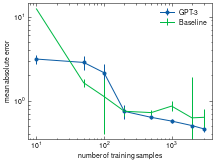

In [88]:
plt.errorbar(compiled_regression_results_agg.index, compiled_regression_results_agg['mean_absolute_error']['median'],  compiled_regression_results_agg['mean_absolute_error']['std'], label='GPT-3', marker='o')
plt.errorbar(compiled_regression_baseline_results.index, compiled_regression_baseline_results['mean_absolute_error']['median'], compiled_regression_baseline_results['mean_absolute_error']['std'], label='Baseline')

plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('number of training samples')
plt.ylabel('mean absolute error')
plt.savefig('polymer_regression.pdf', bbox_inches='tight')